расчет по корреляции Беггса Брилла

на выходе нужна одна функция, которая считала бы градиент давления и необходимые дополнительные данные

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import neftpy.pipe as pipe

Описание метода расчета Беггса Брилла

In [2]:
diam_m = 0.062
theta = 90
eps_m = 0.00001
Ql_rc_m3day = 40
Qg_rc_m3day = 100
Mul_rc_cP = 0.6
Mug_rc_cP = 3.00E-02
sigma_l_Nm = 2.50E-01
rho_lrc_kgm3 = 600
rho_grc_kgm3 = 20
p_atma = 100

print(pipe.npy_Begs_Brill_gradient(diam_m, theta, eps_m, Ql_rc_m3day, Qg_rc_m3day, Mul_rc_cP, Mug_rc_cP, sigma_l_Nm, rho_lrc_kgm3, rho_grc_kgm3))


(np.float64(0.03519006583777442), np.float64(0.035091188981492646), np.float64(9.887685628177268e-05), 0, 0.1533461894360575, 0.3833654735901437, np.float64(0.5902733938196266), 3)


Корреляция Беггса Брилла

In [3]:
q = np.linspace(1,300, 10)

In [4]:
diam_m = 0.062
theta = 90
eps_m = 0.00001
Ql_rc_m3day = 40
Qg_rc_m3day = 100
Mul_rc_cP = 0.6
Mug_rc_cP = 3.00E-02
sigma_l_Nm = 2.50E-01
rho_lrc_kgm3 = 600
rho_grc_kgm3 = 20
p_atma = 100

print(pipe.npy_Begs_Brill_gradient(diam_m, theta, eps_m, Ql_rc_m3day, Qg_rc_m3day, Mul_rc_cP, Mug_rc_cP, sigma_l_Nm, rho_lrc_kgm3, rho_grc_kgm3))


(np.float64(0.03519006583777442), np.float64(0.035091188981492646), np.float64(9.887685628177268e-05), 0, 0.1533461894360575, 0.3833654735901437, np.float64(0.5902733938196266), 3)


In [5]:
bb = np.vectorize(pipe.npy_Begs_Brill_gradient)

In [6]:
q = np.linspace(1,500, 100)
g = bb(diam_m, theta, eps_m, q, Qg_rc_m3day, Mul_rc_cP, Mug_rc_cP, sigma_l_Nm, rho_lrc_kgm3, rho_grc_kgm3)

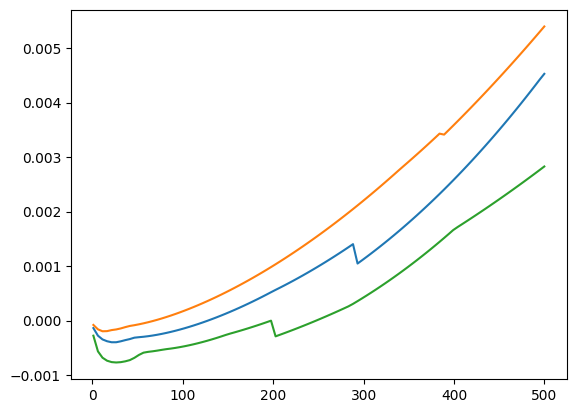

In [7]:
q = np.linspace(1,500, 100)

theta = -1

Qg_rc_m3day = 100
g = bb(diam_m, theta, eps_m, q, Qg_rc_m3day, Mul_rc_cP, Mug_rc_cP, sigma_l_Nm, rho_lrc_kgm3, rho_grc_kgm3)
plt.plot(q, g[0])


Qg_rc_m3day = 200
g = bb(diam_m, theta, eps_m, q, Qg_rc_m3day, Mul_rc_cP, Mug_rc_cP, sigma_l_Nm, rho_lrc_kgm3, rho_grc_kgm3)
plt.plot(q, g[0])

Qg_rc_m3day = 30
g = bb(diam_m, theta, eps_m, q, Qg_rc_m3day, Mul_rc_cP, Mug_rc_cP, sigma_l_Nm, rho_lrc_kgm3, rho_grc_kgm3)
plt.plot(q, g[0])

# Расчет распределения давления в трубе

In [8]:

from scipy.interpolate import interp1d
from scipy.integrate import odeint

In [13]:
import neftpy.fluid as fl
import neftpy.upvt_oil as pvt
import neftpy.uconvert as uc

In [15]:
class Pipe:
    def __init__(self):
        self.q_liq_sm3day = 10 
        self.feed = fl.Feed()
                
        self.p_wh_atma = 20         # давление на устье, бар
        self.t_wh_C = 20          # температура на устье скважины, С
        self.dT_dz = 0.03      # температурный градиент град С на 100 м
        self.h_well = 2000          # измеренная глубина забоя скважины
        self.d_tub_m = 0.089      # диаметр НКТ по которой ведется закачка
        self.roughness_m = 0.01   # шероховатость
        
        # траектория скважины, задается как массив измеренных глубин и значений отклонения от вертикали
        self.h_mes_m = np.array([0,50,100,200,800,1300,1800,2200,2500])
        self.h_vert_m = np.array([0,50,100,200,780,1160,1450,1500,1500])

    def d_int_m(self, h_mes_m):
        return self.d_tub_m
    
    def theta_deg(self, h_mes_m):
        return 90
    
    def calc_grad(self, p_atma, t_C):
        """ 
        расчет градиента давления
        """
        self.feed.calc(p_atma, t_C)
        



In [18]:
p = Pipe()
p.calc_grad(1,1)

In [9]:
# Исходные данные для проведения расчета
q = 100            # дебит скважин м3/сут
p_wh_atma = 20         # давление на устье, бар
t_wh_C = 20          # температура на устье скважины, С
dT_dz = 0.03      # температурный градиент град С на 100 м
h_well = 2000          # измеренная глубина забоя скважины
d_tub_m = 0.089      # диаметр НКТ по которой ведется закачка
ws = 0            # соленость скважины

# траектория скважины, задается как массив измеренных глубин и значений отклонения от вертикали
h_mes_m = np.array([0,50,100,200,800,1300,1800,2200,2500])
h_vert_m = np.array([0,50,100,200,780,1160,1450,1500,1500])

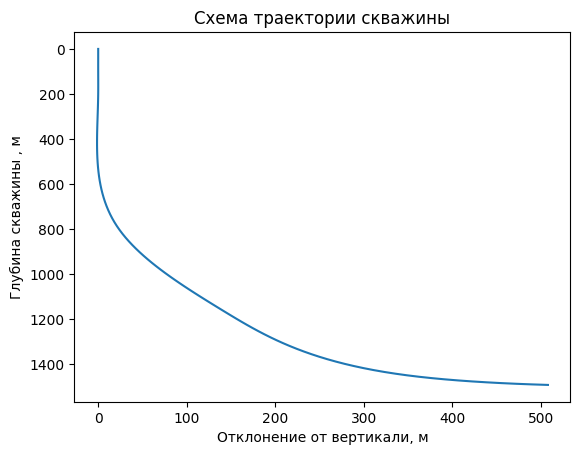

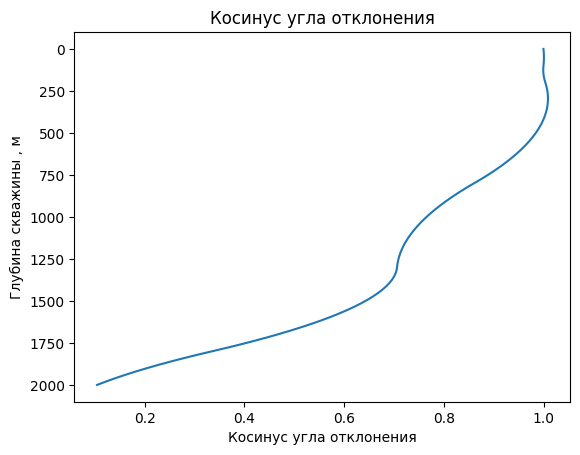

In [11]:
# Подготовка данных по конструкции скважины
# удлинение от измеренной длины - для отрисовки графика
udl_m = interp1d(h_mes_m, h_mes_m-h_vert_m, kind='cubic')
# вертикальная глубина от измеренной
Hv_m = interp1d(h_mes_m, h_vert_m, kind='cubic')

# построим массив углов отклонения от вертикали
Ang =np.arccos( np.diff(h_vert_m)/np.diff(h_mes_m))
# угол от измеренной глубины
Ang_rad = interp1d(h_mes_m[:-1],Ang)
CosAng1_rad = lambda h: ((Hv_m(h+1)-Hv_m(h)) ) #if h > 1 else  np.arccos((Hv_m(h+1)-Hv_m(h)) )

# готовим данные для отрисовки графика
h_ = np.linspace(0, h_well, num=100, endpoint=True)
plt.plot(udl_m(h_), Hv_m(h_), '-')
plt.xlabel("Отклонение от вертикали, м")
plt.ylabel("Глубина скважины , м")
plt.title("Схема траектории скважины")
ax = plt.gca()
ax.invert_yaxis()
plt.show()
plt.plot(CosAng1_rad(h_), (h_), '-')
plt.xlabel("Косинус угла отклонения")
plt.ylabel("Глубина скважины , м")
plt.title("Косинус угла отклонения")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

In [ ]:
# определим функцию для интергрирования
def dPTdL(PT, h):
    dPdL = pipe.npy_Begs_Brill_gradient(Q, PT[0], PT[1], dtub_m ,Ws, CosAng1_rad(h))
    dTdL = TempGrad * CosAng1_rad(h)
    return [dPdL, dTdL]

# задаем граничные условия
PTwh = [Pwh,Twh]
# определяем диапазон и интервалы интегрирования
hs = np.linspace(0, H, 200)
# решаем систему уравнений численно
PTs = odeint(dPTdL, PTwh, hs)
# созраняем результаты расчета
P = PTs[:,0]
T = PTs[:,1]